# Assignment 1: Find a path from the start to the goal

This assignment is worth 15/100 points. 

You need to do this assignment with a group of maximum 3 people in total.

You will program path-finding algorithms using informed and uninformed search and compare them. You will need to implement the following algorithms:

Uninformed Search: 
- BFS
- DFS

Informed Search:
- A*

Answer to all the questions in english, argument, and justify your answers using the obtained results.

### Deadline
March 3th, 2023 at 23.59

### Some Instructions
- You need to fill in your answers here and submit this jupyter notebook via NEO.
- It should run smoothly.
- Any compilation error will affect your total score. 


### Important before starting! 

- DO NOT copy the answers from internet nor from your classmates.
- If there are two or more groups that were discovered cheeting, then they will be penalized with 0/15.
- Use your brain and the material seen in class to program this assignment.
- You should be able to explain and modify your code according to your (or my) needs. 

### Names
You and your classmate names:
- Sharon Sarai Maygua Mendiola


## Code for drawing the map

The following code will help you draw the map. You don't need to modify it.

#### Import libraries

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from queue import Queue
from queue import LifoQueue
from queue import PriorityQueue
import math


####Get maps from Github 


In [57]:
!git clone "https://github.com/sharonmaygua/assigment1_maps.git"

fatal: destination path 'assigment1_maps' already exists and is not an empty directory.


#### Read map from file and define where the start and goal positions are

In [ ]:
map_file = "/content/assigment1_maps/map1.txt"
blank_char = '0'
start_char = '1'
goal_char = '4'
tree_char = '2'
water_char = '3'
visited_char = '5'

def read_map_file(file_name = "/content/assigment1_maps/map1.txt"):
    i = 0
    j = 0
    my_map = []
    start = [0,0]
    goal  = [0,0]
    with open(file_name) as f:
        lines = f.readlines()
        for line in lines:
            line_arr = []
            j = 0
            for char in line:
                # skip carry char
                if char != '\n':
                    line_arr.append(int(char))
                # start char is 1
                if char == start_char:
                    start = [j, i]
                # end char is 3
                if char == goal_char:
                    goal = [j, i]

                j += 1
            my_map.append(line_arr)
            i += 1
        return my_map, start, goal

my_map, start, goal = read_map_file()
print('Start at:', start)
print('Goal at:', goal)

Start at: [2, 6]
Goal at: [16, 2]


#### Draw the map

In [ ]:
# inspired by: https://stackoverflow.com/questions/38973868/adjusting-gridlines-and-ticks-in-matplotlib-imshow
def draw_map(my_map, path = []):
    xlen = len(my_map[0])
    ylen = len(my_map)
    colormap = colors.ListedColormap(["white","yellow",'lightgreen', 'cyan', 'red', 'Linen'])
    
    # set ticks top and bottom
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    
    plt.figure()
    im = plt.imshow(my_map, cmap = colormap)
    ax = plt.gca();

    # Major ticks
    ax.set_xticks(np.arange(0, xlen, 1))
    ax.set_yticks(np.arange(0, ylen, 1))

    # Labels for major ticks
    ax.set_xticklabels(np.arange(0, xlen, 1))
    ax.set_yticklabels(np.arange(0, ylen, 1))

    # Minor ticks
    ax.set_xticks(np.arange(-.5, xlen, 1), minor=True)
    ax.set_yticks(np.arange(-.5, ylen, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)
    
    for step in path:
        plt.plot(step[0], step[1], marker='o', color='b')
        
    ax.text(start[0]-0.3, start[1]+ 0.3, 'S', fontsize=13)
    ax.text(goal[0]-0.3, goal[1]+ 0.3, 'G', fontsize=13)

    plt.show()

## Exercise Problem-Solver Agent

1. What is an Agent?





An agent is anything capable of receiving stimulus (inputs) from its environment with the help of sensors and the it reacts in that medium with an action according to the sequence of perceptions that it has had until that moment. The agent reacts to the environment using actuators (Russell, 2010).

2. What is a Problem-Solver Agent? Define a problem-solver agent to find the path between two points in a map.

A Problem-Solver Agent is a kind of goal-based intelligent agent that given an initial state to which a sequence of actions are applied, reaches a goal state.

## Exercise Uninformed Search

#### color code:

Here is what every element in the map means:

- white (0):   blank space
- yellow (1):  starting position
- green (2):   trees
- cyan (3):    water
- red (4):     goal position
- brown (5):  expanded state (already visited)


For uninformed search let's suppose:
- the agent can't go through trees nor water (they are obstacles).
- the cost to go from one state to another is 1.

#### BFS

1. Implement BFS algorithm to find the path between start and goal. To help you out with this task you can complete the code below using what we have seen in class.

In [ ]:
actions = ['U', 'D', 'L', 'R']

class State:
    def __init__(self):
        self.father = None
        self.value = None

def get_path(state):
    # your code here
    path = []
    current_state = state
    while (current_state!= None):
      path.append(current_state.value)
      current_state = current_state.father
      path_rev = list(reversed(path))
    return path_rev

def goal_test(state, goal):
    # your code here, verify if this state is the goal
    if (state[0]==goal[0] and state[1]==goal[1]): # instead of state.value uses only state (which is a list) because it already send the state.value
      return True


def tf(state, action, my_map):
    x = state[0]
    y = state[1]
    limit_x = len(my_map[0]) - 1
    limit_y = len(my_map) - 1
    next_state = None
    if action == 'L' and x > 0:
        next_state =  [x-1, y]
    elif action == 'R' and x < limit_x:
        next_state = [x+1, y]
    elif action == 'U' and y > 0:
        next_state = [x, y-1]
    elif action == 'D' and y < limit_y:
        next_state = [x, y+1]
    
    if next_state is not None: #
        # verify if we already visited that state 
        # your code here
        new_x = next_state[0]
        new_y = next_state[1]
        if my_map[new_y][new_x]!=int(visited_char) and my_map[new_y][new_x]!=int(tree_char) and my_map[new_y][new_x]!=int(water_char):
            return True, next_state
    return False, next_state

def bfs(start, goal, actions, my_map):
    start_state = State()
    start_state.value = start 
    open_states = Queue()
    open_states.put(start_state)
    closed = [] # create a list for visited items
    num_s_stored_in_queue = 1
    
    while not open_states.empty(): # your code here
        state = open_states.get()
        # print(state.value) # verify how is it moving
        closed.append(state.value) # add the state to the list of visited items
        my_map[state.value[1]][state.value[0]] = int(visited_char)
        
        if (goal_test(state.value, goal)): 
            return (True, state, len(closed), num_s_stored_in_queue) # modification
        
        for action in actions:
            possible, next_pos = tf(state.value, action,  my_map) # sending a state.value not the hole state
            if possible == True:
              next_state = State()
              next_state.value = next_pos
              next_state.father = state
              open_states.put(next_state)
              num_s_stored_in_queue += 1 # counter of states stored in the queue 
              my_map[ next_state.value[1]][ next_state.value[0]] = int(visited_char)
        

            # your code here
    return False, State(), len(closed), num_s_stored_in_queue # can't return only None 


Solution found?  True
Cost  30
Expanded  143
Enqueued  151


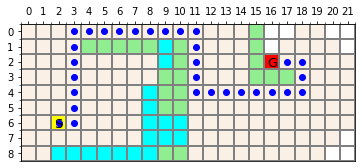

In [ ]:
# actions = ['U', 'R', 'L', 'D']        # mapa1
# actions = ['L', 'D', 'R', 'U']        # mapa1


my_map, start, goal = read_map_file()
found, goal_state, closed_len, num_s_stored_in_queue = bfs(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1 # restore start position  color
my_map[goal[1]][goal[0]] = int(goal_char) # restore goal position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
# print('Path ', path)
print('Cost ',len(path)) # number of steps in the solution path
print('Expanded ', closed_len) # number of states that have already been expanded
print('Enqueued ', num_s_stored_in_queue) # number of states stored in the queue

draw_map(my_map, path)

#### DFS

1. Implement DFS algorithm to find the path between start and goal.

In [ ]:
def dfs(start, goal, actions, my_map):
    # your code here
    start_state = State()
    start_state.value = start 
    open_states = LifoQueue()
    open_states.put(start_state)
    closed = []
    num_s_stored_in_stack = 1

    while not open_states.empty(): # your code here
        state = open_states.get()
        # print(state.value) # verify how is it moving
        closed.append(state.value) # add the state to the list of visited items
        my_map[state.value[1]][state.value[0]] = int(visited_char)
        
        if (goal_test(state.value, goal)): 
            return (True, state, len(closed), num_s_stored_in_stack)
        
        for action in actions:
            possible, next_pos = tf(state.value, action,  my_map) # sending a state.value not the hole state
            if possible == True:
              next_state = State()
              next_state.value = next_pos
              next_state.father = state
              open_states.put(next_state)
              num_s_stored_in_stack += 1 # counter of states stored in the stack
              my_map[ next_state.value[1]][ next_state.value[0]] = int(visited_char)
              
    return False, _, len(closed), num_s_stored_in_stack 

Solution found?  True
Path  [[2, 6], [2, 5], [2, 4], [2, 3], [2, 2], [2, 1], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [14, 1], [14, 2], [14, 3], [14, 4], [15, 4], [16, 4], [17, 4], [18, 4], [18, 3], [18, 2], [18, 1], [18, 0], [17, 0], [16, 0], [16, 1]]
Cost  34
Expanded  91
Stacked  122


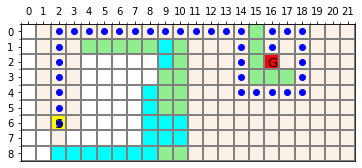

In [ ]:
# actions = ['D', 'L', 'R', 'U']        # mapa7
# actions = ['U', 'R', 'L', 'D']        # mapa1
actions = ['L', 'D', 'R', 'U']        # mapa1
# actions = ['R', 'L', 'U', 'D']        # mapa1
# actions = ['D', 'U', 'L', 'R']        # mapa1
# actions = ['R', 'D', 'U', 'L']        # mapa1




my_map, start, goal = read_map_file() # ADD '/content/assigment1_maps/map7.txt'    when necessary
found, goal_state, closed_len, num_s_stored_in_stack = dfs(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1 # restore start position  color
my_map[goal[1]][goal[0]] = int(goal_char) # restore goal position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Path ', path)
print('Cost ',len(path))
print('Expanded ', closed_len) # number of states that have already been expanded
print('Stacked ', num_s_stored_in_stack) # number of states stored in the stack
draw_map(my_map, path)

2. Now change the order of the actions. Do you have a shorter path (hint: to answer this, calculate the cost of the path and experiment with diferent order for the actions)? Why is that?

In [ ]:
# The tests with the different actions are in commented lines in the previous code block and aswered below.
# inspired by: https://www.geeksforgeeks.org/python-itertools-permutations/
# permutations view
from itertools import permutations 
l = list(permutations(actions)) 
print(l)

[('U', 'R', 'L', 'D'), ('U', 'R', 'D', 'L'), ('U', 'L', 'R', 'D'), ('U', 'L', 'D', 'R'), ('U', 'D', 'R', 'L'), ('U', 'D', 'L', 'R'), ('R', 'U', 'L', 'D'), ('R', 'U', 'D', 'L'), ('R', 'L', 'U', 'D'), ('R', 'L', 'D', 'U'), ('R', 'D', 'U', 'L'), ('R', 'D', 'L', 'U'), ('L', 'U', 'R', 'D'), ('L', 'U', 'D', 'R'), ('L', 'R', 'U', 'D'), ('L', 'R', 'D', 'U'), ('L', 'D', 'U', 'R'), ('L', 'D', 'R', 'U'), ('D', 'U', 'R', 'L'), ('D', 'U', 'L', 'R'), ('D', 'R', 'U', 'L'), ('D', 'R', 'L', 'U'), ('D', 'L', 'U', 'R'), ('D', 'L', 'R', 'U')]


To answer this question, I wanted to work initially with a smaller map (map7), only for testing purposes, in order to better understand the algorithm's actions. 

Test the action with the comment `#map 7` and copy the path of map7.**txt**





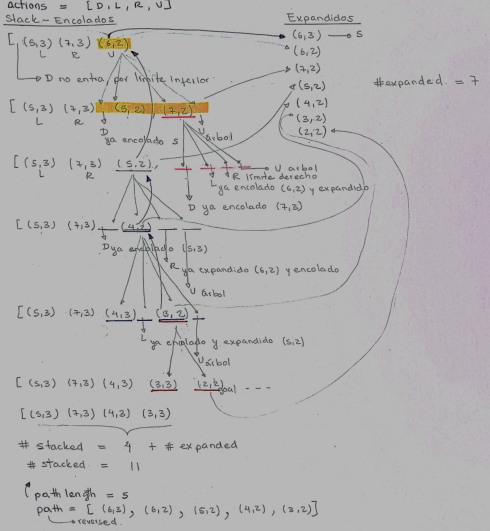

Looking at the previous image, we can reaffirm that DFS grows in the depth of the last items added, which means that it will always prioritize the actions that are at the bottom of the action list. 

Thus, with a bad combination in the order of actions, the algorithm will visit more states and take more steps on its way to finding the solution. 

In the same way, if it is given a sequence of actions that accelerate its approach to the objective state (this happens if we can see the position of the goal), it will prioritize the most convenient actions.

Then, it will expand the nearest and possible action and it will prioritize the convenient action again (the one that we have put on purpose because in this case we have previous knowledge of the goal's position). This way it will reach the solution with fewer expanded states and in fewer steps.

Considering this idea. We will try 5 combinations of actions with map1. Test the actions that have `#map 1` commented out and erase the previos path when reading the map.

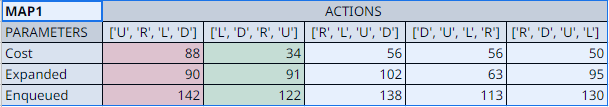

Having tested the actions we now see their performances in a comparison table. I will focus only on the first two actions because they are the most interesting and because they were chosen on purpose.

The first action, ['U', 'R', 'L', 'D'], has DOWN as the action to be prioritized, this will cause its movement in DOWN to expand with a new 4 possible positions if there are no trees, water or if they were not visited. Then, the expanded state will be moved to the expanded list and will continue to expand to the next possible state in the stack. It will prioritize DOWN again, checking if its movement is possible in those new directions and if it doesn't take it, it will move to the Left but it will expand again, prioritizing DOWN.

Now, since we are allowed to see the map, we can take advantage of this knowledge and order the actions conveniently so that movements towards UP and towards RIGHT are prioritized (with the actions ['L', 'D', 'R', ' U']). And in fact it does, because with this new combination we managed to obtain a route with fewer steps, very similar to the one found by BFS.

3. Does it happen the same thing when you change the order of actions for BFS (hint: to answer this calculate the cost of the path and experiment with diferent order for the actions)? Experiment, show your results and discuss.

In [ ]:
# The tests with the different actions are in commented lines in the sixth code block. 

No, in BFS the results do not depend in a great way on the sequence of actions but, as the search in BFS is in breadth, this algorithm exhausts all the existing possibilities at a certain depth before starting to expand states of superior depths. 

This gives it the advantage of finding the solution at a minimum depth and therefore returns the solution in the optimal number of steps.

Now, although BFS finds the best solution (if we talk about the number of steps, which we call Cost in the tables), it consumes a lot of memory resources and we can see that in the number of states it expands and visits. BFS also has exponential growth with respect to time but is bounded by the depth of the solution.

To verify this, look at the following tables that have the values obtained from the BFS shares and a comparative table of the performance of BFS and DFS. 

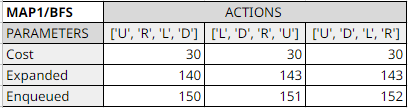

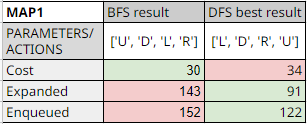

4. Did BFS or DFS find the optimal path? What is the cost of it? Give some examples

Part of this answer is commented on in the previous question.

The optimal path is given by BFS, because it finds the solution in the minimum depth but consumes a lot of memory.

Depending on the search, BFS could exhaust its resources by expanding too many states and not finding the solution in them so that it is no longer possible to continue its search for the solution. In that sense DFS does a better job. 
However, DFS can find very long solutions if the sequence of actions it performs is not optimal, this is a point against DFS because we might not know the order of actions that suits it best.

5. Execute BFS and DFS for the map2.txt file. Which one finds a better path? Which one would you choose for the path-finding problem? 

Solution found?  True
Cost  27
Expanded  95
Enqueued  102


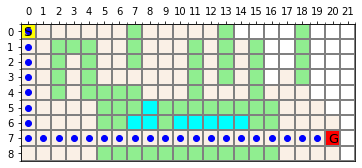

Solution found?  True
Path  [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [6, 1], [6, 2], [6, 3], [7, 3], [8, 3], [9, 3], [10, 3], [10, 2], [10, 1], [10, 0], [11, 0], [12, 0], [12, 1], [12, 2], [12, 3], [12, 4], [13, 4], [14, 4], [14, 3], [14, 2], [14, 1], [14, 0], [15, 0], [16, 0], [17, 0], [17, 1], [17, 2], [16, 2], [16, 3], [16, 4], [17, 4], [18, 4], [19, 4], [20, 4], [21, 4], [21, 5], [21, 6], [20, 6]]
Cost  45
Expanded  105
Stacked  122


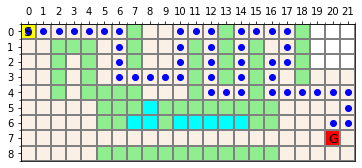

In [ ]:
actions = ['U', 'D', 'L', 'R']

my_map, start, goal = read_map_file('/content/assigment1_maps/map2.txt')
found, goal_state, closed_len, num_s_stored_in_queue = bfs(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1 # restore start position  color
my_map[goal[1]][goal[0]] = int(goal_char) # restore goal position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
# print('Path ', path)
print('Cost ',len(path)) # number of steps in the solution path
print('Expanded ', closed_len) # number of states that have already been expanded
print('Enqueued ', num_s_stored_in_queue) # number of states stored in the queue

draw_map(my_map, path)



my_map, start, goal = read_map_file('/content/assigment1_maps/map2.txt') 
found, goal_state, closed_len, num_s_stored_in_stack = dfs(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1 # restore start position  color
my_map[goal[1]][goal[0]] = int(goal_char) # restore goal position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Path ', path)
print('Cost ',len(path))
print('Expanded ', closed_len) # number of states that have already been expanded
print('Stacked ', num_s_stored_in_stack) # number of states stored in the stack
draw_map(my_map, path)

BFS, I would use BFS because it has a better performance. It finds the optimal path and has less expanded and enqueued states.

## Exercises Informed Search

1. Let's suppose:
- the agent can now go through trees and water.
- the cost to go from one state to another is:
    - empty spaces: 1
    - trees: 3
    - water: 5
    
Solve the problem using A* using the Manhattan distance as a heuristic. 

You may use map3.txt and map4.txt here.

In [ ]:
class StateA_star:
    def __init__(self):
        self.father = None
        self.value = None
        self.f = 0 # por que cero y no None
        self.g = 0
        self.h = 0
    '''
    def __lt__(self, other):
      return self.f <other.f
    '''
    def __lt__(self, other): # states
        if self.f < other.f:
          return True
        elif self.f == other.f:
          # if self.value[0] <= other.value[0]: # se podrian comparar con otras cosas
          if self.g <= other.g: # se podrian comparar con otras cosas # los costos sin arboles
            return True
          else:
            return False
        elif self.f > other.f:
            return False
    
def cost(cord, my_map): # ver que recibe en pseuddo
    if my_map[cord[1]][cord[0]] == int (blank_char) or my_map[cord[1]][cord[0]] == int (goal_char): 
      return 1
    elif my_map[cord[1]][cord[0]] == int (tree_char):
      return 3
    elif my_map[cord[1]][cord[0]] == int (water_char):
      return 5
    ##else: 
      #return 10000 # para asegurarme de que no le convenga ir por ahi
    
  

def manhattan(state_1, state_2):
    return abs(state_1[0]-state_2[0]) + abs(state_1[1]-state_2[1])

def tf_star(state, action, my_map):
    x = state[0]
    y = state[1]
    limit_x = len(my_map[0]) - 1
    limit_y = len(my_map) - 1
    next_state = None
    if action == 'L' and x > 0:
        next_state =  [x-1, y]
    elif action == 'R' and x < limit_x:
        next_state = [x+1, y]
    elif action == 'U' and y > 0:
        next_state = [x, y-1]
    elif action == 'D' and y < limit_y:
        next_state = [x, y+1]
    
    if next_state is not None: #
        # verify if we already visited that state 
        # your code here
        new_x = next_state[0]
        new_y = next_state[1]
        if my_map[new_y][new_x]!=int(visited_char):
            return True, next_state
        
    return False, next_state


def A_star(start, goal, actions, my_map): # start and goal are lists of size 2
    # your code here 
    start_state = StateA_star() # create a class StateA_star() named  start_state
    start_state.value = start # put the start list values in the value list of the class
    open_states = PriorityQueue() # create a PriorityQueue() named open_states
    open_states.put(start_state)
    closed = [] # create a list for visited items
    
    while not open_states.empty(): 
        state = open_states.get() # obtain a state from the priority que
        closed.append(state) # add the state to the list of visited items OJO
        my_map[state.value[1]][state.value[0]] = int(visited_char) # mark that position as visited
        
        if (goal_test(state.value, goal)): # send the value of the state and the goal, the goal is list
            return (True, state, len(closed))
        
        for action in actions:
            possible, next_pos = tf_star(state.value, action,  my_map) #sending a state.value not the hole state
            '''
            if possible:
              next_state = StateA_star()
              next_state.value = next_pos
              next_state.father = state
            if next_state not in closed: # not visited 
              next_state.h = manhattan(next_state.value, goal)
              next_state.g = state.g + cost(next_state.value, my_map) 
              next_state.f = next_state.g + next_state.h
              open_states.put(next_state)
              my_map[ next_state.value[1]][ next_state.value[0]] = int(visited_char) 
            # if next_state in open_states: is this necessary?
            '''



            
            if possible:
              next_state = StateA_star()
              next_state.value = next_pos
              next_state.father = state
              next_state.h = manhattan(next_state.value, goal)
              next_state.g = state.g + cost(next_state.value, my_map)
              next_state.f = next_state.g + next_state.h
              '''
              if next_state.value[0]==15 and next_state.value[1]==1:
                print(next_state.g, state.g)
              '''
              if next_state in open_states.queue:
              # print(next_state.g, state.g)
                if next_state.g > state.g:
                  # print('f')
                  continue
              open_states.put(next_state)
              my_map[ next_state.value[1]][ next_state.value[0]] = int(visited_char)

            '''
            if next_state  in closed: # already visited but tf is doing this task
              print('f')
              continue
            '''
    return False, _, len(closed)

Solution found?  True
Cost  21
Expanded  124


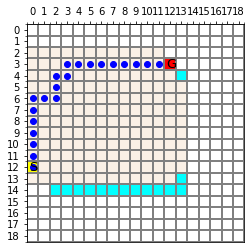

In [ ]:
my_map, start, goal = read_map_file('/content/assigment1_maps/map4.txt') # '/content/assigment1_maps/map3.txt'  '/content/assigment1_maps/map4.txt' 
found, goal_state, closed_len= A_star(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1 # restore start position  color
my_map[goal[1]][goal[0]] = int(goal_char) # restore goal position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost ', goal_state.g)
print('Expanded ', closed_len)
draw_map(my_map, path)

2. How many states expands A*?

It expands 144 states in map3 and 124 states in map4.

3. Is A* optimal and complete for this case? Justify your answers

Yes, it is. A* is giving us the answer and guarantees that we will have it. It is also being optimal because it is finding the path with the lowest cost, which is 22. Even following the diagonal path (which seems to be the most accurate) it will reach the goal state with a cost equal to 22. (using map 3). This also happen while running the code with map4 but its solution cost is 21.

4. Create an empty map of 21x21 put the start position in one extreme, the goal position in another and execute BFS and A* in this map and compare both algorithms. Answer some questions such as: what is the states space? which one expands/visits less states? which one does a better job? 

Solution found?  True
Cost  40
Expanded  441


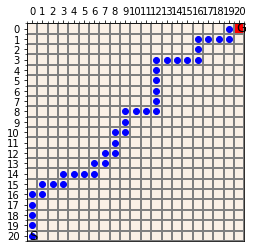

In [ ]:
# A_star
my_map, start, goal = read_map_file('/content/assigment1_maps/map5.txt') 
found, goal_state, closed_len= A_star(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1 # restore start position  color
my_map[goal[1]][goal[0]] = int(goal_char) # restore goal position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
print('Cost ', goal_state.g)
print('Expanded ', closed_len)
draw_map(my_map, path)

Solution found?  True
Cost  40
Expanded  441
Enqueued  441


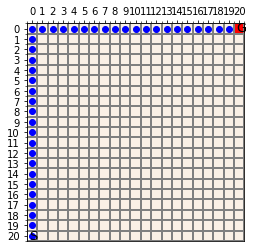

In [ ]:
# BFS
my_map, start, goal = read_map_file('/content/assigment1_maps/map5.txt')
found, goal_state, closed_len, num_s_stored_in_queue = bfs(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1 # restore start position  color
my_map[goal[1]][goal[0]] = int(goal_char) # restore goal position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
# print('Path ', path)
print('Cost ',len(path)) # number of steps in the solution path
print('Expanded ', closed_len) # number of states that have already been expanded
print('Enqueued ', num_s_stored_in_queue) # number of states stored in the queue
draw_map(my_map, path)

# Extra observations

##State and _




##A* costs